# Read Text in Different Language From Image In Python

In [1]:
# For windows users
#!conda install pytorch torchvision torchaudio cpuonly -c pytorch

In [2]:
# Otherwise
%%capture
!pip install easyocr

In [3]:
# Install OpenCV
%%capture
!pip install opencv-python-headless==4.1.2.30

In [4]:
!pip install pytesseract
import pytesseract

In [5]:
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import pytesseract

In [6]:
# Import the library
import easyocr

# Load the model
reader_en_fr = easyocr.Reader(['en', 'fr'])

# Since chinese is not compatible with French, is it creating as a standalone model
reader_ch = easyocr.Reader(['ch_sim'])

reader_en = easyocr.Reader(['en'])

reader_ja = easyocr.Reader(['ja'])

reader_te = easyocr.Reader(['te'])

reader_hi = easyocr.Reader(['hi'])

reader_en = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [36]:
#reading the image
image = cv2.imread('Text.jpg')

In [37]:
if image is None:
    print('Could not open or find the image: ')
    exit(0)

In [38]:
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.4 # contrast control
beta = 0    # brightness control

In [39]:
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

In [40]:
from IPython.display import Image
import requests

def show_image(image_name):
  return Image(filename=image_name)

def read_text(image_name, model_name, in_line=False):

  # Read the data
  text = model_name.readtext(image_name, detail = 0, paragraph=in_line)

  return '\n'.join(text)

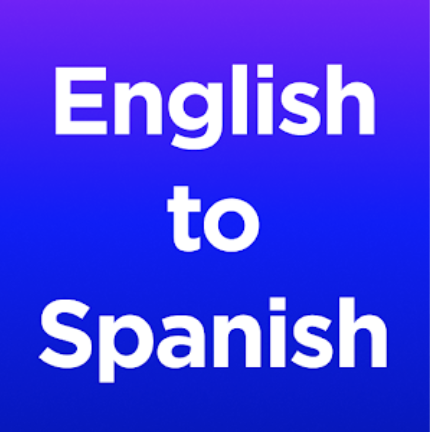

In [41]:
show_image("Text.jpg")


In [42]:
#grayscaling contrasted image
gray_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

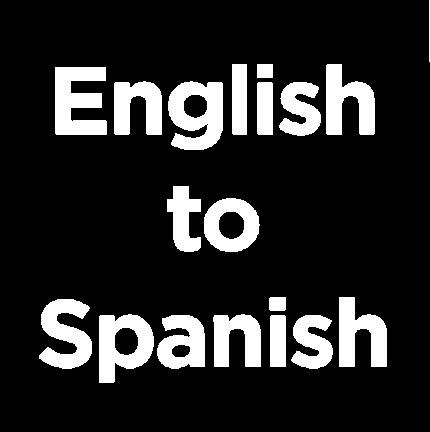

True

In [43]:
#thresholding image
ret,thresh1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)

#saving image
cv2.imwrite('Text.jpg',thresh1)


In [44]:
en_text = read_text("Text.jpg", reader_en)
print(en_text)

English
to
Spanish


### **Extraction Process**

#### **French Image**

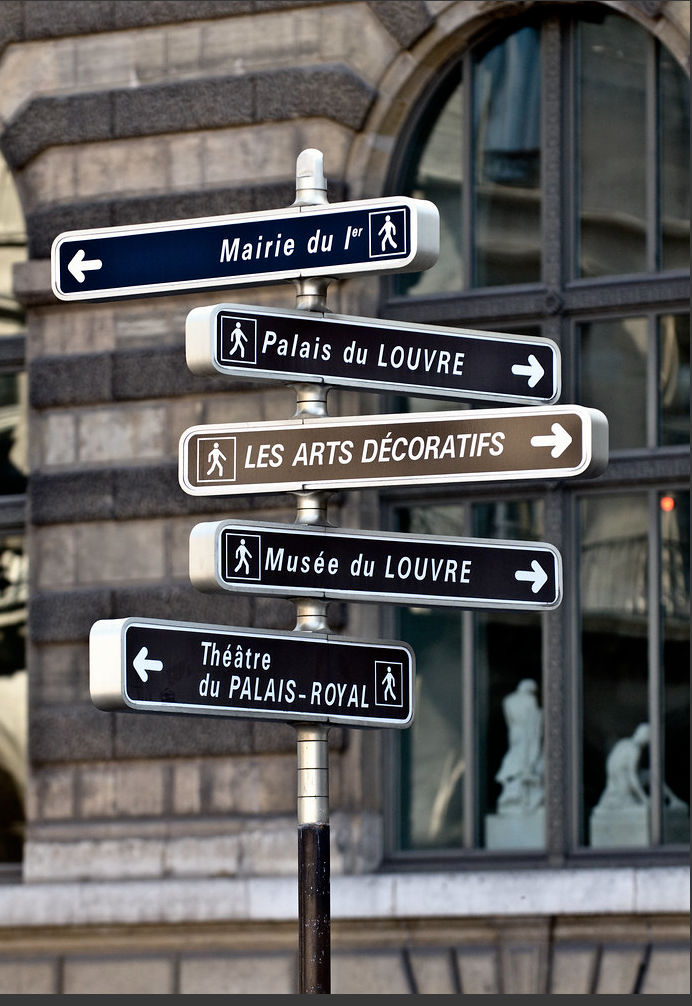

In [45]:
show_image("French.jpg")

In [46]:
fr_text = read_text("French.jpg", reader_en_fr)
print(fr_text)

du /
[Palais du LOUVRE
LES ARTS DÉCORATIFS
[Musée du LOUVRE
du PALAIS-RoyalL
Mairie
Théâtre


#### **English Image**

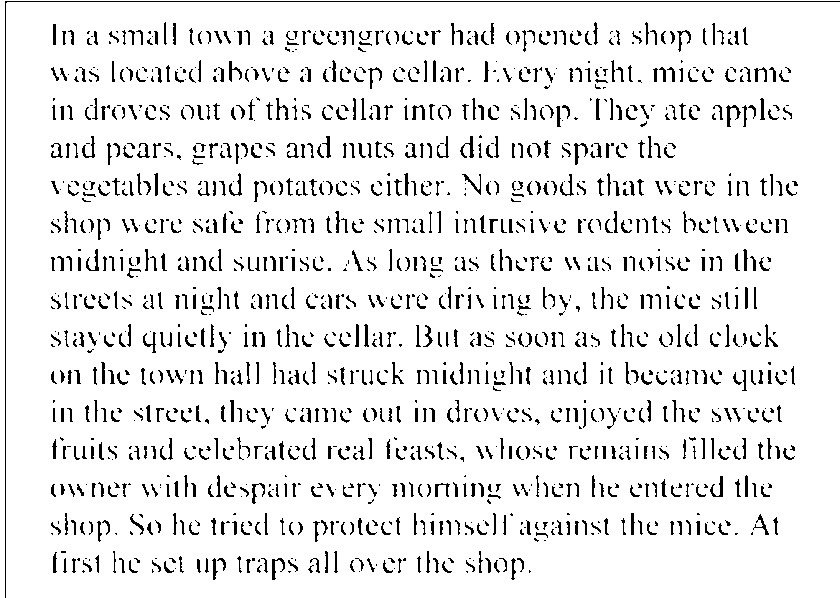

In [48]:
show_image("English.jpg")

In [50]:
en_text = read_text("English.jpg", reader_en_fr)
print(en_text)

In a small t6w7 a grcengrocer had opened a shop that
"as located above a decp cellar. I:vcry night. mice canc
in droves out of this cellar into the shop. hey ate apples
and pcars. grapes and nuts and did not spare the
vcgctables and potatocs cither. No gds that were in the
shop were' sale fron the smal] intrusive radents betnecn
midnight and sunrise. As
as there " :s noisc in the
slreels al
night and cars were dri
by, the mice still
slaycd quictly in the' cellar. Bu as soon as thc old clock
o thc [own hall had struck midnight and it becamne
in the slrect. they cane ou in droves, cnjoyed uhe shvet
ruits and cclebrated real Icasts, whose remains Villed the
oner witlh despair every mrting when
entered tle
shop. So he triedl t6 protect himsell against the mice. At
(irst he sct up traps all over the shop.
long
ing
quiet
he


#### **Chinese Image**

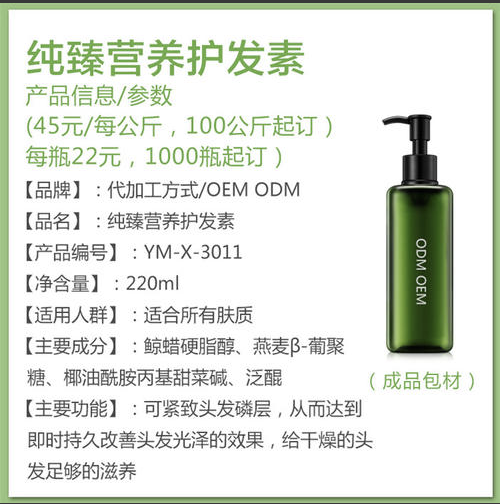

In [51]:
show_image("Chinese.jpg")

In [52]:
ch_text = read_text("Chinese.jpg", reader_ch)
print(ch_text)

纯臻营养护发素
产品信息/参数
(45元/每公斤
100公斤起订 )
每瓶22元
1000瓶起订 )
[品牌]
代加工方式/08/ 0/
[品名]
纯臻营养护发素
[产品编号]
丫/-义-3011
昱
[净含量]
2201
昱
[适用人群]
适合所有肤质
[主要成分]
鲸蜡硬脂醇
燕'-葡聚
糖
椰油酰胺丙基甜菜碱
泛醌
成品包材 )
[主要功能]
可紧致头发磷层
从而达到
即时持久改善头发光泽的交果
给干燥的头
发足够的滋养


#### Info Covid19  

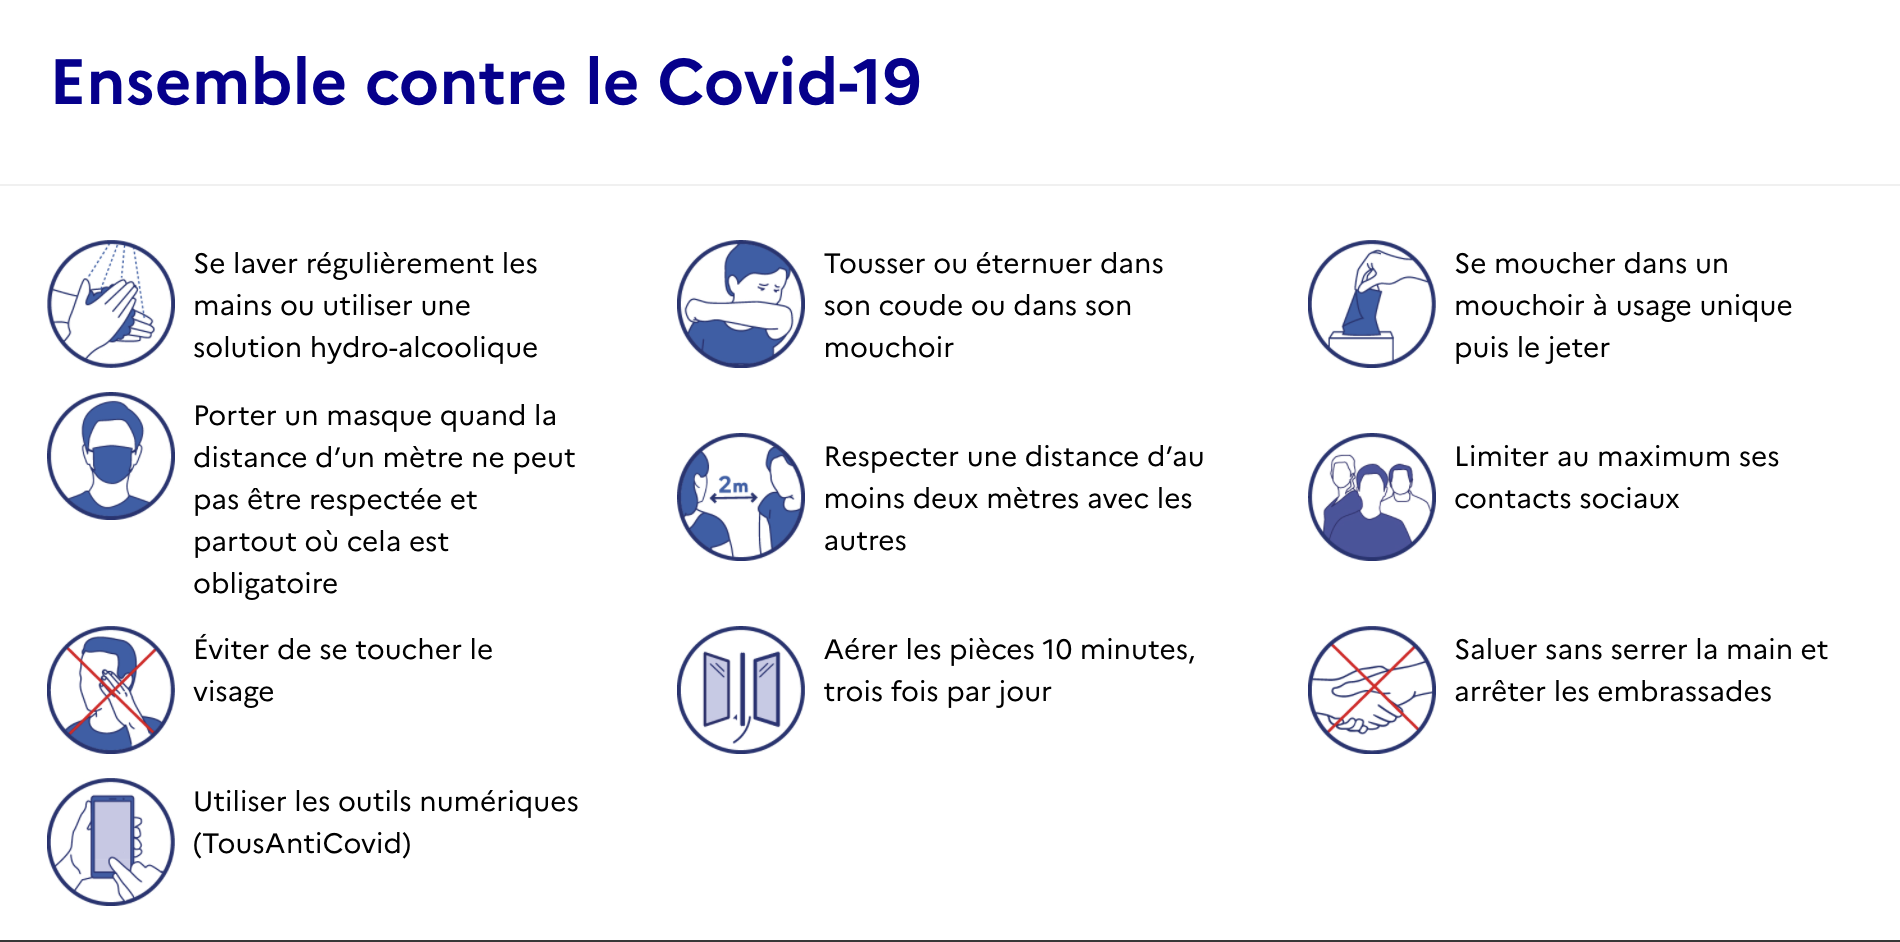

In [54]:
show_image("covid.jpg")

In [55]:
fr_text = read_text("covid.jpg", reader_en_fr)
print(fr_text)

Ensemble contre le Covid-19
Se laver régulièrement les
Tousser ou éternuer dans
Se moucher dans un
mains ou utiliser une
son coude ou dans son
mouchoir à usage unique
solution hydro-alcoolique
mouchoir
puis le jeter
Porter un masque quand la
distance dun mètre ne
Respecter une distance d'au
Limiter au maximum ses
2m
pas être respectée et
moins deux mètres avec les
contacts sociaux
partout où cela est
autres
obligatoire
Éviter de se toucher le
Aérer les pièces 10 minutes,
Saluer sans serrer la main et
visage
trois fois par jour
arrêter les embrassades
Utiliser les outils numériques
(TousAntiCovid)
peut


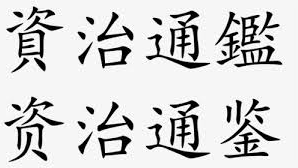

In [56]:
show_image("japanese.jpg")

In [57]:
ja_text = read_text("japanese.jpg", reader_ja)
print(ja_text)

資治通鑑
・治通釜


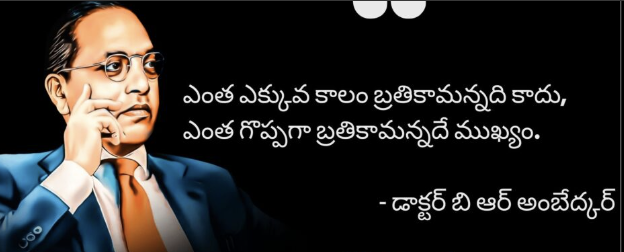

In [58]:
show_image("telugu.jpg")

In [60]:
te_text = read_text("telugu.jpg", reader_te)
print(te_text)

ఎంతఎక్కువకాలం బ్రతికామన్నదికాదుః
ఎంతగొప్పగా బ్రతికామన్నదే ముఖ్యం:
డాక్టర్బి ఆర్ అంబేద్కర్


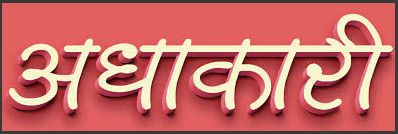

In [61]:
show_image("hindi.jpg")

In [62]:
hi_text = read_text("hindi.jpg", reader_hi)
print(hi_text)

अधाकारी
